<a href="https://colab.research.google.com/github/MohammedRSaad/Osteoporosis-indecator/blob/main/code/Copy_of_MLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [126]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Importing the data**

In [127]:
body_measures = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Body%20Measures%20(BMX_H).csv").iloc[:, :-1]
body_measures

,SEQN,BMXWT,BMXHT,BMXBMI
0,73557,78.3,171.3,26.7
1,73558,89.5,176.8,28.6
2,73559,88.9,175.3,28.9
3,73560,32.2,137.3,17.1
4,73561,52.0,162.4,19.7
...,...,...,...,...
9808,83727,71.8,171.3,24.5
9809,83728,11.3,84.4,15.9
9810,83729,89.6,162.3,34.0
9811,83730,22.8,119.1,16.1


In [128]:
muscle_strength = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Muscle%20Strength%20-%20Grip%20Test%20(MGX_H).csv")
muscle_strength

,SEQN,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ
0,73557,18.3,1.0,27.5,1.0,20.7,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2
1,73558,32.5,1.0,27.8,1.0,31.3,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5
2,73559,43.1,1.0,45.7,1.0,42.9,1.0,47.9,1.0,41.9,1.0,46.9,1.0,91.0
3,73560,13.1,1.0,12.2,1.0,14.3,1.0,16.7,1.0,13.4,1.0,17.9,1.0,32.2
4,73561,10.6,1.0,16.2,1.0,12.1,1.0,16.0,1.0,13.1,1.0,17.8,1.0,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,83726,46.4,1.0,39.0,1.0,37.9,1.0,36.9,1.0,46.1,1.0,39.3,1.0,85.7
8287,83727,26.2,1.0,32.6,1.0,31.5,1.0,35.4,1.0,32.9,1.0,37.2,1.0,70.1
8288,83729,24.1,1.0,14.1,2.0,26.5,1.0,20.1,1.0,25.0,1.0,20.0,1.0,46.6
8289,83730,9.9,1.0,9.3,1.0,10.9,1.0,9.9,1.0,10.4,1.0,8.4,1.0,20.8


In [129]:
bone_measures = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Dual-Energy%20X-ray%20Absorptiometry%20-%20Whole%20Body%20(DXX_H).csv")
bone_measures

,SEQN,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73558,198.48,0.800,213.60,0.816,2276.24,1.024
1,73560,56.28,0.554,62.14,0.610,1127.39,0.856
2,73562,178.13,0.800,179.34,0.853,2332.22,1.154
3,73566,111.12,0.648,114.08,0.664,1624.97,0.959
4,73568,129.42,0.698,140.17,0.704,1906.45,1.100
...,...,...,...,...,...,...,...
6028,83721,224.04,0.838,232.31,0.866,2993.70,1.256
6029,83726,183.19,0.830,189.22,0.858,2461.25,1.157
6030,83727,157.85,0.709,166.02,0.727,2115.80,1.017
6031,83729,140.19,0.697,162.25,0.713,2112.83,1.110


In [130]:
demo_data = pd.read_csv("https://github.com/MohammedRSaad/Osteoporosis-indecator/raw/main/Data/CSV/Demographic%20Variables%20and%20Sample%20Weights%20(DEMO_H).csv")
demo_data

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3
0,73557,1,69,4
1,73558,1,54,3
2,73559,1,72,3
3,73560,1,9,3
4,73561,2,73,3
...,...,...,...,...
9995,83552,1,60,2
9996,83553,1,71,7
9997,83554,1,49,7
9998,83555,2,9,4


# **Data preparation** 

### Merging data

In [162]:
datasets = [body_measures, muscle_strength, demo_data, bone_measures]
df = pd.concat([df.set_index(['SEQN']) for df in datasets], axis=1).reset_index()
df

,SEQN,BMXWT,BMXHT,BMXBMI,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,...,MGDCGSZ,RIAGENDR,RIDAGEYR,RIDRETH3,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73557,78.3,171.3,26.7,18.3,1.0,27.5,1.0,20.7,1.0,...,55.2,1.0,69.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,89.5,176.8,28.6,32.5,1.0,27.8,1.0,31.3,1.0,...,61.5,1.0,54.0,3.0,198.48,0.800,213.60,0.816,2276.24,1.024
2,73559,88.9,175.3,28.9,43.1,1.0,45.7,1.0,42.9,1.0,...,91.0,1.0,72.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,32.2,137.3,17.1,13.1,1.0,12.2,1.0,14.3,1.0,...,32.2,1.0,9.0,3.0,56.28,0.554,62.14,0.610,1127.39,0.856
4,73561,52.0,162.4,19.7,10.6,1.0,16.2,1.0,12.1,1.0,...,30.9,2.0,73.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10166,83727,71.8,171.3,24.5,26.2,1.0,32.6,1.0,31.5,1.0,...,70.1,NaN,NaN,NaN,157.85,0.709,166.02,0.727,2115.80,1.017
10167,83728,11.3,84.4,15.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10168,83729,89.6,162.3,34.0,24.1,1.0,14.1,2.0,26.5,1.0,...,46.6,NaN,NaN,NaN,140.19,0.697,162.25,0.713,2112.83,1.110
10169,83730,22.8,119.1,16.1,9.9,1.0,9.3,1.0,10.9,1.0,...,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df.columns

Index(['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1',
       'MGXH2T1E', 'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3',
       'MGXH1T3E', 'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH3', 'DXXLABMC', 'DXXLABMD', 'DXXRABMC', 'DXXRABMD', 'DXDTOBMC',
       'DXDTOBMD'],
      dtype='object')

### Data cleaning

In [164]:
df = df[df['RIDAGEYR'] > 15].dropna().reset_index(drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,...,MGDCGSZ,RIAGENDR,RIDAGEYR,RIDRETH3,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73558,89.5,176.8,28.6,32.5,1.0,27.8,1.0,31.3,1.0,...,61.5,1.0,54.0,3.0,198.48,0.800,213.60,0.816,2276.24,1.024
1,73566,61.8,152.8,26.5,16.6,2.0,19.6,1.0,17.7,1.0,...,38.8,2.0,56.0,3.0,111.12,0.648,114.08,0.664,1624.97,0.959
2,73568,47.1,152.5,20.3,27.4,1.0,27.9,1.0,30.9,1.0,...,61.0,2.0,26.0,3.0,129.42,0.698,140.17,0.704,1906.45,1.100
3,73574,56.8,158.0,22.8,33.8,1.0,33.0,1.0,35.2,1.0,...,71.4,2.0,33.0,6.0,133.77,0.719,147.72,0.744,1953.20,1.091
4,73576,67.3,170.4,23.2,45.7,1.0,49.4,1.0,44.4,1.0,...,96.6,1.0,16.0,4.0,188.69,0.783,212.92,0.868,2644.91,1.195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,83540,74.0,166.0,26.9,16.4,1.0,17.1,1.0,17.4,1.0,...,36.1,1.0,30.0,3.0,198.30,0.861,213.45,0.897,2716.18,1.284
3425,83541,72.1,163.1,27.1,31.3,1.0,24.6,1.0,36.1,1.0,...,62.9,1.0,44.0,1.0,189.69,0.855,207.89,0.900,2532.22,1.275
3426,83546,90.7,185.5,26.4,50.7,1.0,47.8,1.0,50.6,1.0,...,106.6,1.0,59.0,3.0,241.94,0.909,272.40,0.933,3380.93,1.369
3427,83554,89.3,169.0,31.3,38.1,1.0,34.4,1.0,36.4,1.0,...,74.2,1.0,49.0,7.0,225.08,0.871,236.01,0.902,2889.10,1.296


### Data report

In [134]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

### Chosing feasures

In [165]:
data = df[['BMXWT', 'BMXHT', 'MGXH1T1', 'MGXH2T1', 'MGXH1T2', 'MGXH2T2', 'MGXH1T3', 'MGXH2T3', 'MGDCGSZ', 'RIAGENDR', 'RIDAGEYR', 'DXXLABMD']]
data

,BMXWT,BMXHT,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,MGDCGSZ,RIAGENDR,RIDAGEYR,DXXLABMD
0,89.5,176.8,32.5,27.8,31.3,29.0,30.1,22.5,61.5,1.0,54.0,0.800
1,61.8,152.8,16.6,19.6,17.7,20.7,18.1,20.7,38.8,2.0,56.0,0.648
2,47.1,152.5,27.4,27.9,30.9,30.1,28.4,30.0,61.0,2.0,26.0,0.698
3,56.8,158.0,33.8,33.0,35.2,36.2,30.7,34.6,71.4,2.0,33.0,0.719
4,67.3,170.4,45.7,49.4,44.4,49.1,46.9,49.7,96.6,1.0,16.0,0.783
...,...,...,...,...,...,...,...,...,...,...,...,...
3424,74.0,166.0,16.4,17.1,17.4,18.4,17.7,16.3,36.1,1.0,30.0,0.861
3425,72.1,163.1,31.3,24.6,36.1,26.8,29.9,25.4,62.9,1.0,44.0,0.855
3426,90.7,185.5,50.7,47.8,50.6,51.8,54.8,50.6,106.6,1.0,59.0,0.909
3427,89.3,169.0,38.1,34.4,36.4,36.1,34.4,35.3,74.2,1.0,49.0,0.871


### setting X & Y

In [166]:
y = data['DXXLABMD']
y

0       0.800
1       0.648
2       0.698
3       0.719
4       0.783
        ...  
3424    0.861
3425    0.855
3426    0.909
3427    0.871
3428    0.598
Name: DXXLABMD, Length: 3429, dtype: float64

In [167]:
x = data.drop('DXXLABMD', axis = 1)
x

,BMXWT,BMXHT,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,MGDCGSZ,RIAGENDR,RIDAGEYR
0,89.5,176.8,32.5,27.8,31.3,29.0,30.1,22.5,61.5,1.0,54.0
1,61.8,152.8,16.6,19.6,17.7,20.7,18.1,20.7,38.8,2.0,56.0
2,47.1,152.5,27.4,27.9,30.9,30.1,28.4,30.0,61.0,2.0,26.0
3,56.8,158.0,33.8,33.0,35.2,36.2,30.7,34.6,71.4,2.0,33.0
4,67.3,170.4,45.7,49.4,44.4,49.1,46.9,49.7,96.6,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
3424,74.0,166.0,16.4,17.1,17.4,18.4,17.7,16.3,36.1,1.0,30.0
3425,72.1,163.1,31.3,24.6,36.1,26.8,29.9,25.4,62.9,1.0,44.0
3426,90.7,185.5,50.7,47.8,50.6,51.8,54.8,50.6,106.6,1.0,59.0
3427,89.3,169.0,38.1,34.4,36.4,36.1,34.4,35.3,74.2,1.0,49.0


### Splitting data

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


# **Model Building**

### Linear Regression

In [169]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Training the model

In [170]:
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

### Evaluating the Performance 

In [171]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.003774,0.588129,0.003827,0.552497


### Linear Regression graph

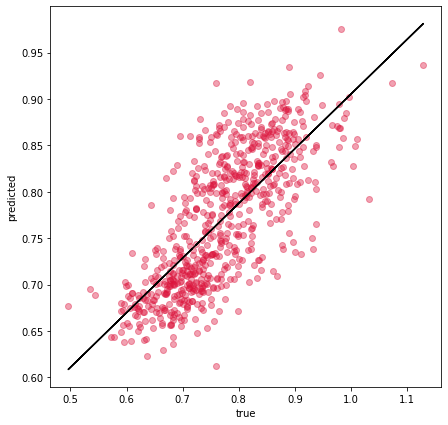

In [172]:

plt.figure(figsize=(7,7))
plt.scatter(x=y_test, y=y_lr_test_pred, c="crimson" ,alpha=0.4)

z = np.polyfit(y_test.to_numpy(), y_lr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#000000')
plt.ylabel('predicted')
plt.xlabel('true')

plt.show()

# **Predecring osteoporosis**

### Calculating mean and standard dviation

In [174]:
BMD_mean = df['DXXLABMD'].mean()
print(f'mean: {BMD_mean}')
BMD_std = df['DXXLABMD'].std()
print(f'std: {BMD_std}')

mean: 0.768268008165646
std: 0.09510048836954495


In [178]:
y_test_t_score = (pd.DataFrame(y_test) - BMD_mean)/ BMD_std
y_test_cases = y_test_t_score < -1
y_test_cases

,DXXLABMD
2884,False
2520,False
1444,False
2459,False
1216,False
...,...
774,False
2309,False
635,False
2320,False


In [179]:
y_test_pred_t_score = (pd.DataFrame(y_lr_test_pred) - BMD_mean)/ BMD_std
y_test_pred_cases = y_test_pred_t_score < -1
y_test_pred_cases

,0
0,False
1,False
2,False
3,False
4,False
...,...
681,False
682,False
683,False
684,False


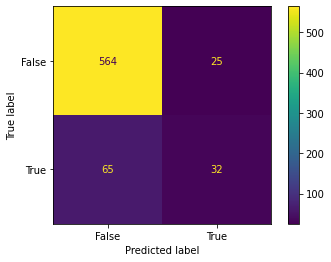

In [180]:
confusion_matrix = metrics.confusion_matrix(y_test_cases, y_test_pred_cases)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [184]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test_cases, y_test_pred_cases).ravel()
specificity = tn / (tn+fp)
sensitifivity = tp / (tp+fn)

In [187]:
print(f'sepecificity: {specificity}')
print(f'sepecificity: {sensitifivity}')

sepecificity: 0.9575551782682513
sepecificity: 0.32989690721649484
